<a href="https://colab.research.google.com/github/CrazyAncestor/DM_Neutrino_Flux/blob/master/LMC_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Different models' profiles
def NFW_dens(x):
    return (1/((1+x)*(1+x)*x))
def Burkert_dens(x):
    return ((1/((1+x)*(1+x*x))))
def Hernquist_dens(x):
    return (1/((1+x)*(1+x)*(1+x)*x))
def Plummer_dens(x):
    return (1+x*x)**(-2.5)

In [3]:
def EnclosedMass(r_cut,rho_s,rs,model_name):
    # r_cut is the cutoff radius, rho_s is the scaling density, rs is the scaling radius,and model_name is the type of the model.
    x = r_cut/rs
    def massbase(x):
        if model_name =="Burkert":
            return 4*np.pi*x*x*(rs**3) *Burkert_dens(x)
        elif model_name =="NFW":
            return 4*np.pi*x*x*(rs**3) *NFW_dens(x)
        elif model_name =="Plummer":
            return 4*np.pi*x*x*(rs**3) *Plummer_dens(x)
        elif model_name =="Hernquist":
            return 4*np.pi*x*x*(rs**3) *Hernquist_dens(x)
    f = integrate.nquad(massbase, [[0,x]])[0] *rho_s
    return f

In [4]:
def FindScalingDens(mass,rs,r_cut,model_name):
    # Given a mass, the scaling radius, cutoff radius, and the type of model, we can calculate the corresponding scaling density.
    rho_0 =1.0
    mass_init = EnclosedMass(r_cut,rho_0,rs,model_name)
    rho_0 = rho_0*mass/mass_init
    return rho_0

In [5]:
def FindScalingRadius(ra,rb,ma,mb,model_name):
    # Given a set of (ra,ma) and (rb,mb), calculate the corresponding scaling radius.
    # ra and rb are the cutoff radii, and ma and mb are their corresponding cutoff masses.
    # We iterate over different scaling radius rs to find if the cutoff masses can correspond to the given values ra, rb.
    def f(rs):
        ma2 = EnclosedMass(ra,1.0,rs,model_name)
        mb2 = EnclosedMass(rb,1.0,rs,model_name)
        return np.abs(mb2/ma2 - mb/ma)
    rs = ra
    res = minimize(f, rs, method='nelder-mead')
    return res.x

From Erkal et al. (2019), we know that the enclosed mass of LMC within radius 8.7 kpc is 1.7e10 MSun, and now we adopt the pro. rMW+LMC model setup in Erkal et al. (2019)'s paper. The total mass of the model is 1.38e11 MSun. We now want to first determine this LMC model's cutoff radius and scaling radius.

In [6]:
# First set up LMC's parameters
ra = 8.7 # unit kpc
ma = 1.7e10 # enclosed mass within 8.7 kpc, unit: MSun
r_cut =  np.linspace(30,50,100) # possible cutoff radius of LMC
m_tot = 1.38e11 # total mass of LMC
model_type = "Hernquist" # We chose Hernquist profile

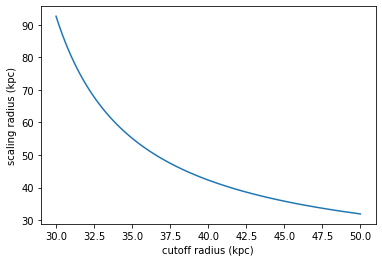

In [7]:
rs = [] # scaling radius corresponding to specific enclosed masses and cutoff radii
for i in range(len(r_cut)):
  rs.append(FindScalingRadius(ra,r_cut[i],ma,m_tot,model_type))
plt.plot(r_cut,rs)
plt.xlabel('cutoff radius (kpc)')
plt.ylabel('scaling radius (kpc)')
plt.show()

We can see that the corresponding scaling radius varies a lot with different choice of cutoff radius. The maximum cutoff radius is 50 kpc, which is the distance from LMC to Earth.

Now we choose 50 kpc to be the cutoff radius and calculate its corresponding scaling radius and density, and then obtain its density profile.

In [11]:
r_cut = 50
rs = FindScalingRadius(ra,r_cut,ma,m_tot,model_type)
rho_s = FindScalingDens(m_tot,rs,r_cut,model_type)
r = np.linspace(0.01,50,100) # unit: kpc
m = []
for i in range(len(r)):
  m.append(EnclosedMass(r[i],rho_s,rs,model_type))

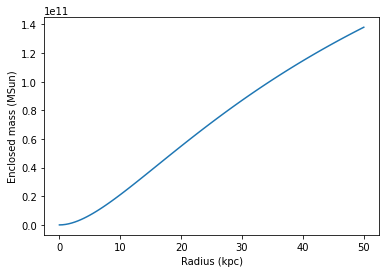

In [12]:
plt.plot(r,m)
plt.xlabel('Radius (kpc)')
plt.ylabel('Enclosed mass (MSun)')
plt.show()